In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

In [14]:
df=pd.read_csv("../training_data/featured_data.csv")

In [15]:
df_1=df[df['Heart Attack Likelihood']=='Yes']
df_0=df[df['Heart Attack Likelihood']=='No']

In [27]:
df_0=df_0.sample(2000)
print(df_1.size)

52988


In [28]:
df=df_0
df=df.append(df_1)

C:\Users\Rohit Shere\AppData\Local\Temp\ipykernel_16308\3496799659.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_1)


In [29]:
df[df['Heart Attack Likelihood']=='No']

,Age,Gender,Region,Urban/Rural,SES,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),...,Stress Level,Resting Heart Rate (bpm),ECG Results,Chest Pain Type,Maximum Heart Rate Achieved,Exercise Induced Angina,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),Heart Attack Likelihood,Pluse Pressure
6776,26,Female,Central,Urban,Middle,Never,Occasionally,Vegetarian,Sedentary,11,...,High,73,Normal,Typical,145,Yes,99.6,331,No,2.9
1446,32,Female,West,Urban,Low,Occasionally,Occasionally,Non-Vegetarian,Sedentary,1,...,High,87,Normal,Non-anginal,198,No,98.8,214,No,24.2
8305,23,Female,South,Urban,Low,Never,Never,Vegetarian,Sedentary,9,...,Low,92,Abnormal,Non-anginal,151,No,95.6,364,No,26.3
4183,21,Female,North-East,Rural,Low,Never,Never,Vegetarian,Sedentary,14,...,Medium,95,Abnormal,Atypical,120,No,92.7,498,No,73.8
889,31,Female,South,Urban,High,Occasionally,Never,Vegetarian,Sedentary,6,...,Medium,117,Normal,Typical,156,No,96.1,174,No,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6102,27,Male,South,Urban,Low,Regularly,Never,Vegetarian,Sedentary,1,...,Medium,75,Normal,Typical,145,No,93.0,211,No,68.0
3905,26,Female,East,Urban,Middle,Never,Never,Vegetarian,Sedentary,14,...,High,60,Normal,Typical,131,No,93.7,349,No,29.5
3289,28,Male,South,Rural,Middle,Occasionally,Regularly,Vegetarian,Moderate,5,...,Medium,89,Normal,Asymptomatic,141,No,91.0,404,No,19.1
8449,32,Male,Central,Urban,Middle,Never,Never,Vegetarian,Sedentary,5,...,Medium,85,Normal,Typical,191,No,96.8,110,No,54.3


C:\Users\Rohit Shere\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


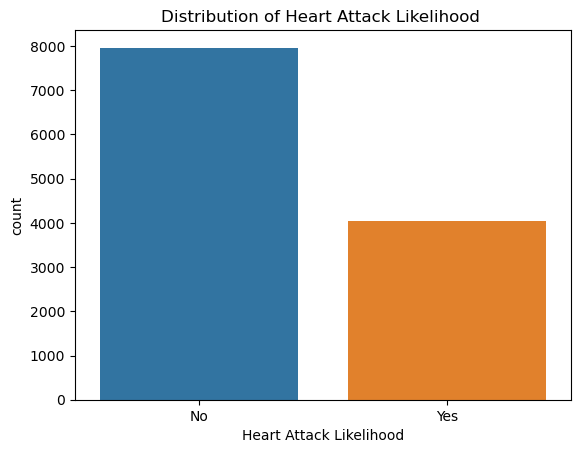

In [5]:
#Distribution of target class
sns.countplot(df['Heart Attack Likelihood'])
plt.title("Distribution of Heart Attack Likelihood ")
plt.show()

C:\Users\Rohit Shere\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


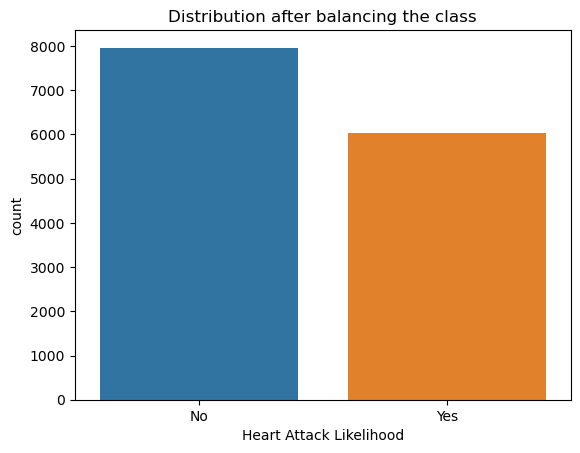

In [12]:
#Check the distirbution now 
sns.countplot(df['Heart Attack Likelihood'])
plt.title("Distribution after balancing the class")
plt.show()

In [14]:
import csv
df.to_csv('../training_data/featured_data.csv',index=False)

PermissionError: [Errno 13] Permission denied: '../training_data/featured_data.csv'

In [6]:
#SLplitting the data
X=df.drop("Heart Attack Likelihood",axis=1)
y=df['Heart Attack Likelihood']

In [44]:
X.columns

Index(['Age', 'Gender', 'Region', 'Urban/Rural', 'SES', 'Smoking Status',
       'Alcohol Consumption', 'Diet Type', 'Physical Activity Level',
       'Screen Time (hrs/day)', 'Sleep Duration (hrs/day)',
       'Family History of Heart Disease', 'Diabetes', 'Hypertension',
       'Cholesterol Levels (mg/dL)', 'BMI (kg/m²)', 'Stress Level',
       'Resting Heart Rate (bpm)', 'ECG Results', 'Chest Pain Type',
       'Maximum Heart Rate Achieved', 'Exercise Induced Angina',
       'Blood Oxygen Levels (SpO2%)', 'Triglyceride Levels (mg/dL)',
       'Pluse Pressure'],
      dtype='object')

In [45]:
X_train, X_test,y_train ,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

In [32]:
# 🔹 Define Feature Types
numerical_features = ['Age',
 'Screen Time (hrs/day)',
 'Sleep Duration (hrs/day)',
 'Cholesterol Levels (mg/dL)',
 'BMI (kg/m²)',
 'Resting Heart Rate (bpm)',
 'Maximum Heart Rate Achieved',
 'Blood Oxygen Levels (SpO2%)',
 'Triglyceride Levels (mg/dL)',
 'Pluse Pressure']

ordinal_features = {
    "Chest Pain Type": ["Asymptomatic", "Non-anginal", "Atypical", "Typical"],# Ordered by severity
    "Smoking Status":['Never','Occasionally','Regularly'],
    'Alcohol Consumption':['Never','Occasionally','Regularly'],
    "Physical Activity Level": ["Sedentary", "Moderate", "High"],  # Increasing activity
    "SES": ["Low", "Middle", "High"],  # Socioeconomic status
    "Stress Level":['Low','Medium','High']
    
}

categorical_features = ['Gender', 'Region', 'Urban/Rural', 'SES', 'Smoking Status',
       'Alcohol Consumption', 'Diet Type', 'Physical Activity Level',
       'Family History of Heart Disease', 'Diabetes', 'Hypertension',
       'Stress Level', 'ECG Results', 'Chest Pain Type',
       'Exercise Induced Angina']

# 🔹 Define Transformers
ordinal_transformers = [(col, OrdinalEncoder(categories=[categories]), [col]) for col, categories in ordinal_features.items()]
one_hot_transformer = ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
scaler_transformer = ('scaler', StandardScaler(), numerical_features)

# 🔹 Combine into ColumnTransformer
preprocessor = ColumnTransformer(ordinal_transformers +[one_hot_transformer,scaler_transformer] )

# 🔹 Define Pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier (100))  # Change model here if needed
])

#🔹 Split Dataset
X = df.drop(columns=['Heart Attack Likelihood'])  # Features
y = df['Heart Attack Likelihood']# Target variable
# y=y.replace(['No','Yes'],[0,1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 🔹 Train Model
model_pipeline.fit(X_train, y_train)

# 🔹 Predictions
y_pred = model_pipeline.predict(X_test)

# 🔹 Evaluate Model
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Model Accuracy: 0.49133663366336633
              precision    recall  f1-score   support

          No       0.49      0.51      0.50       400
         Yes       0.50      0.48      0.49       408

    accuracy                           0.49       808
   macro avg       0.49      0.49      0.49       808
weighted avg       0.49      0.49      0.49       808



In [33]:
#model with same distribution of traget classes
import pickle

# Save the model
with open("../models/model_rm.pkl", "wb") as file:
    pickle.dump(model_pipeline, file)



In [48]:
import json
import joblib
pipeline=model_pipeline
# Save pipeline separately
joblib.dump(pipeline[:-1], "./models/transformers.pkl")  # Save everything except the model

# Save model hyperparameters as JSON
model_params = pipeline[-1].get_params()
with open("./models/model_params.json", "w") as f:
    json.dump(model_params, f)


In [15]:
X_t=preprocessor.fit_transform(X)


In [16]:
y_t=y.replace(['No','Yes'],[0,1])

In [17]:
rf=RandomForestClassifier()
model=rf.fit(X,y)

In [18]:
model

RandomForestClassifier()

In [19]:
model.classes_


array([0, 1], dtype=int64)

In [20]:
import joblib
joblib.dump(preprocessor,'./models/preprecessor2.pkl')

['./models/preprecessor2.pkl']

In [22]:
joblib.dump(model,'./models/model_a.pkl')

['./models/model_a.pkl']